# CS670 Group Project Phase 3
Team members:<br>
Alexander Burke Alexander.Burke001@umb.edu<br>
Divya Bajaj : Divya.Bajaj001@umb.edu<br>
Yu-Ju Chien : Yuju.Chien001@umb.edu<br>
Oleksandr Pimenov: pialgi@live.com<br>

In [142]:
import numpy as np
from sklearn import preprocessing

# Task 1: Split the experimental samples and normalize the samples
data0 = np.load('data_selected_1980_2010.npy')
data1 = np.load('target_1980_2010.npy')
# Concatenate data_selected(features) with target
data = np.concatenate((data0, data1), axis = 1)
normalized_x = preprocessing.normalize(data0)
print("Raw data before normalization:")
print(data0)
print("\nData after normalization:")
print(normalized_x)

split = 9497
x_train, x_test, y_train, y_test = normalized_x[:split, :], normalized_x[split:, :], data1[:split, 1:], data1[split:, 1:]
print("\nSize after spliting data into training set and testing set: ")
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

from imblearn.over_sampling import SMOTE 
x_train_balanced, y_train_balanced = SMOTE().fit_sample(x_train, y_train.ravel())
print("\nSize of balanced data: ")
print(x_train_balanced.shape)
print(y_train_balanced.shape)

Raw data before normalization:
[['12.66' '15.85' '279.88' '290.75']
 ['13.5' '-13.42' '279.48' '290.91']
 ['11.28' '8.75' '279.83' '291.23']
 ..., 
 ['0.70001' '-1.88' '284.47' '288.55']
 ['5.12' '-2.23' '282.5' '289.02']
 ['7.7' '3.42' '282.4' '289.55']]

Data after normalization:
[[ 0.0313305   0.039225    0.69263676  0.71953744]
 [ 0.03342772 -0.03322963  0.69202804  0.72033018]
 [ 0.0279116   0.02165128  0.69242044  0.72062897]
 ..., 
 [ 0.00172756 -0.00463967  0.70204566  0.71211472]
 [ 0.01266729 -0.0055172   0.69892778  0.71505878]
 [ 0.01903354  0.00845386  0.69806118  0.71573518]]

Size after spliting data into training set and testing set: 
((9497L, 4L), (1803L, 4L))
((9497L, 1L), (1803L, 1L))

Size of balanced data: 
(18102L, 4L)
(18102L,)


In [143]:
# K-Nearest-Neighbors Classifer with imbalanced data
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

accuracy = []
range = np.arange(1, 30)
max = -1
k = 0
for n in range:
    print "K = %d" % n
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train, y_train.ravel())
    y_pred = knn.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    print "Accuracy: %f" % acc
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    if (max < acc):
        max = acc
        k = n
print(accuracy)
print "max_accuracy = %f" % max 
print "k = %d" % k

# We get better accuracy after k reaches 12 and the accuracy is 0.9339988907376594.

K = 1
Accuracy: 0.902940
[[1613   71]
 [ 104   15]]
             precision    recall  f1-score   support

        0.0       0.94      0.96      0.95      1684
        1.0       0.17      0.13      0.15       119

avg / total       0.89      0.90      0.90      1803

K = 2
Accuracy: 0.931226
[[1678    6]
 [ 118    1]]
             precision    recall  f1-score   support

        0.0       0.93      1.00      0.96      1684
        1.0       0.14      0.01      0.02       119

avg / total       0.88      0.93      0.90      1803

K = 3
Accuracy: 0.929562
[[1672   12]
 [ 115    4]]
             precision    recall  f1-score   support

        0.0       0.94      0.99      0.96      1684
        1.0       0.25      0.03      0.06       119

avg / total       0.89      0.93      0.90      1803

K = 4
Accuracy: 0.931226
[[1679    5]
 [ 119    0]]
             precision    recall  f1-score   support

        0.0       0.93      1.00      0.96      1684
        1.0       0.00      0.00      0.

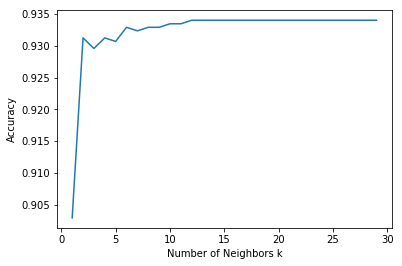

In [144]:
import matplotlib.pyplot as plot
%matplotlib inline

plot.plot(range, accuracy)
plot.xlabel('Number of Neighbors k')
plot.ylabel('Accuracy')

In [145]:
#now is the time to evaluate how we did
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

# True Negative = 1684  False Positive = 0
# False Negative = 119  True Positive = 0

[[1684    0]
 [ 119    0]]
             precision    recall  f1-score   support

        0.0       0.93      1.00      0.97      1684
        1.0       0.00      0.00      0.00       119

avg / total       0.87      0.93      0.90      1803



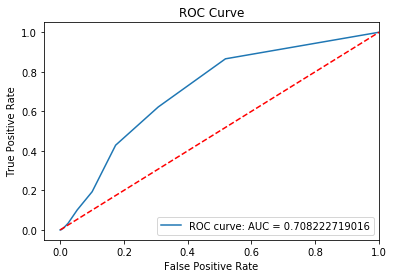

AUC = 0.708223


In [146]:
# Receiver Operating Characteristic Curve with imbalanced data
from sklearn.metrics import roc_auc_score
y_pred_prob = knn.predict_proba(x_test)[::, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
# True Positive Rate, tpr = (TP) / (TP + FN)
# False Positive Rate, fpr = (FP) / (FP + TN)
# print(thresholds)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plot.plot(fpr, tpr, label = "ROC curve: AUC = " + str(auc))
plot.title('ROC Curve')
plot.legend(loc = 'lower right')
plot.plot([0, 1], [0, 1], 'r--')
plot.xlim([-0.05, 1.0])
plot.ylim([-0.05, 1.05])
plot.ylabel('True Positive Rate')
plot.xlabel('False Positive Rate')
plot.show()
print "AUC = %f" % auc

# 0.5 < AUC < 1: Better than randomly ordered but not yet a perfect classifier
# for which all positive come after all negatives

In [147]:
# KNN with balanced data

accuracy_balanced = []
range = np.arange(1, 30)
max1 = -1
k_balanced = 0
for n in range:
    print "K = %d" % n
    knn_balanced = KNeighborsClassifier(n_neighbors = n)
    knn_balanced.fit(x_train_balanced, y_train_balanced.ravel())
    y_pred = knn.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    accuracy_balanced.append(acc)
    print "Accuracy: %f" % acc
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    if (max1 < acc):
        max1 = acc
        k_balanced = n
print(accuracy_balanced)
print "max_accuracy = %f" % max1
print "k = %d" % k_balanced

# We get same accuracy, which is 0.9339988907376594, with different k number.

K = 1
Accuracy: 0.933999
[[1684    0]
 [ 119    0]]
             precision    recall  f1-score   support

        0.0       0.93      1.00      0.97      1684
        1.0       0.00      0.00      0.00       119

avg / total       0.87      0.93      0.90      1803

K = 2
Accuracy: 0.933999
[[1684    0]
 [ 119    0]]
             precision    recall  f1-score   support

        0.0       0.93      1.00      0.97      1684
        1.0       0.00      0.00      0.00       119

avg / total       0.87      0.93      0.90      1803

K = 3
Accuracy: 0.933999
[[1684    0]
 [ 119    0]]
             precision    recall  f1-score   support

        0.0       0.93      1.00      0.97      1684
        1.0       0.00      0.00      0.00       119

avg / total       0.87      0.93      0.90      1803

K = 4
Accuracy: 0.933999
[[1684    0]
 [ 119    0]]
             precision    recall  f1-score   support

        0.0       0.93      1.00      0.97      1684
        1.0       0.00      0.00      0.

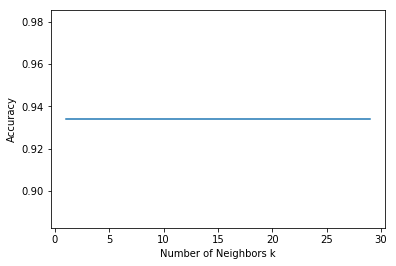

In [148]:
plot.plot(range, accuracy_balanced)
plot.xlabel('Number of Neighbors k')
plot.ylabel('Accuracy')

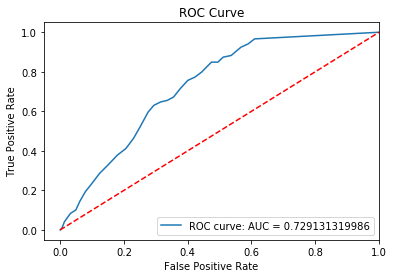

AUC = 0.729131


In [149]:
y_pred_prob = knn_balanced.predict_proba(x_test)[::, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
# True Positive Rate, tpr = (TP) / (TP + FN)
# False Positive Rate, fpr = (FP) / (FP + TN)
# print(thresholds)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plot.plot(fpr, tpr, label = "ROC curve: AUC = " + str(auc))
plot.title('ROC Curve')
plot.legend(loc = 'lower right')
plot.plot([0, 1], [0, 1], 'r--')
plot.xlim([-0.05, 1.0])
plot.ylim([-0.05, 1.05])
plot.ylabel('True Positive Rate')
plot.xlabel('False Positive Rate')
plot.show()
print "AUC = %f" % auc

# KNN with balanced data gets higher AUC = 0.727632 than imbalanced data's AUC = 0.708223

# For the best performance with KNN classifier and best performance with naive 
# bayes classifier, the naive bayes classifier gets higher AUC (0.843021) than
# KNN's AUC (0.729131). Therefore, the naive bayes classifier is better to use in
# this data set and the balanced data set gets better result than the imbalanced
# data set